In [420]:
import numpy as np
import matplotlib.pyplot as plt

In [421]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [422]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 401)
t = np.linspace(0, 15, 201)
dt = t[1] - t[0]
tt, xx = np.meshgrid(t, xi)
X = f1(xx, tt) + f2(xx, tt)
print(X.shape)

(401, 201)


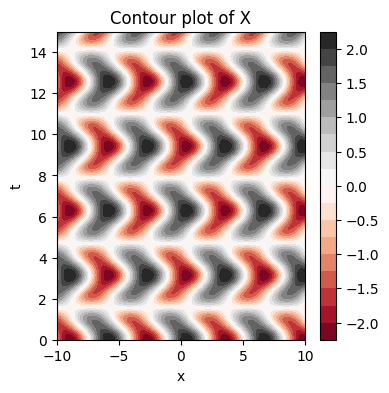

In [423]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()


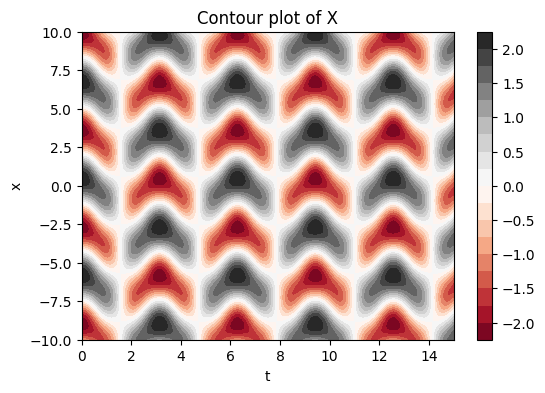

In [424]:
plt.figure(figsize=(6, 4))
plt.contourf(tt.T, xx.T, np.real(X.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Contour plot of X')
plt.show()

In [425]:
X_1 = X[:, :-1]
X_2 = X[:, 1:]


In [426]:
# Step 1 - SVD
U, S, VT = np.linalg.svd(X_1,full_matrices=0)
V=VT.conj().T
Sigma = np.diag(S)
print(U.shape,Sigma.shape, V.shape)


(401, 200) (200, 200) (200, 200)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


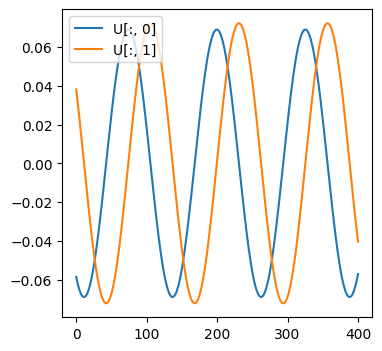

In [427]:

plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
#plt.plot(U[:, 2], label='U[:, 2]')
#plt.plot(U[:, 3], label='U[:, 3]')
plt.legend(loc='upper left')
plt.show()


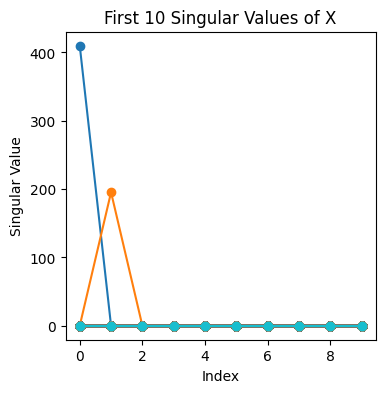

In [428]:
plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [429]:
print(Sigma[:4])


[[4.09821756e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

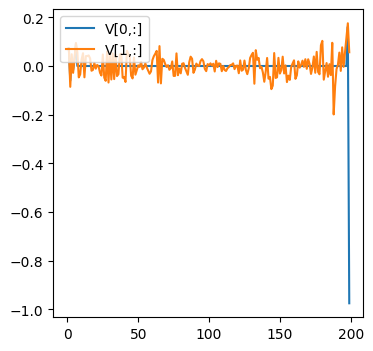

In [431]:
plt.figure(figsize=(4, 4))
plt.plot(V[0,:], label='V[0,:]')
plt.plot(V[1,:], label='V[1,:]')
#plt.plot(V[2,:], label='V[2,:]')
#plt.plot(V[3,:], label='V[3,:]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [432]:
U, Sigma, V = U[:, :2], Sigma[:2,:2], V[:, :2]
print(U.shape, Sigma.shape, V.shape)

(401, 2) (2, 2) (200, 2)


In [433]:
print(X_2.shape)


(401, 200)


In [434]:
print(U[:2,:2])


print(V[:2,:2])


[[-0.05864261+0.00127746j  0.0381626 -0.00254912j]
 [-0.06038855+0.00123511j  0.03504822-0.00246461j]]
[[0.07002794-0.j         0.07364181-0.j        ]
 [0.06994062-0.00516751j 0.07145185-0.01593672j]]


In [435]:
A_tilde = (U.conj().T) @ X_2 @ V @ np.linalg.inv(Sigma)
Lambda, W = np.linalg.eig(A_tilde)
print(A_tilde)

[[ 0.99717275+0.07503605j  0.00315361-0.00248209j]
 [-0.00227925-0.00330319j  0.97481018+0.22300002j]]


In [449]:
print(Lambda)

[0.99718882+0.07492971j 0.97479411+0.22310636j]


In [450]:
print(W)

[[ 0.99964109+0.j         -0.01952857-0.01833895j]
 [ 0.01952857-0.01833895j  0.99964109+0.j        ]]


In [437]:
Phi = X_2 @ V @ np.linalg.inv(Sigma) @ W
print(Phi[:2,:])

[[-0.05779974-0.00381428j  0.03866066+0.00731204j]
 [-0.05960048-0.00393311j  0.03563217+0.00673925j]]


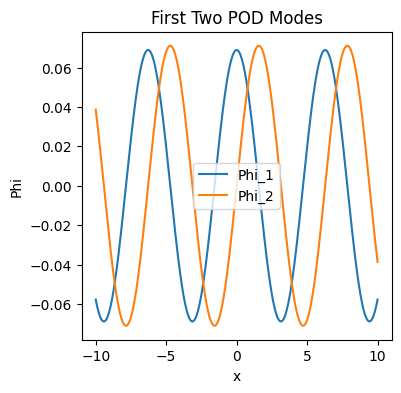

In [438]:
plt.figure(figsize=(4, 4))
plt.plot(xi, Phi[:, 0], '-', label='Phi_1')
plt.plot(xi, Phi[:, 1], '-', label='Phi_2')
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.title('First Two POD Modes')
plt.show()

In [439]:
b, residuals, rank, sigma = np.linalg.lstsq(Phi, X_1, rcond=None)


In [440]:
b.shape


(2, 200)

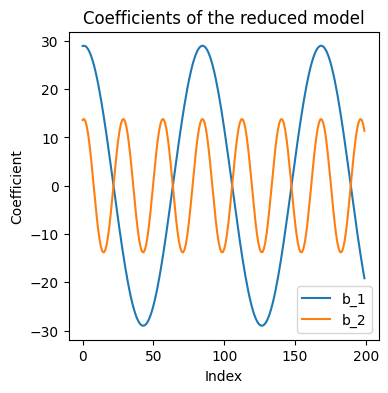

In [441]:
plt.figure(figsize=(4, 4))
plt.plot(b[0], '-', label='b_1')
plt.plot(b[1], '-', label='b_2')
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.legend()
plt.title('Coefficients of the reduced model')
plt.show()

In [442]:
Omega = np.log(Lambda)/dt


In [443]:
print(Omega)


[ 2.00863802e-15+1.j -4.79597096e-15+3.j]


In [459]:
b = np.linalg.lstsq(Phi,X_1[:,0],rcond=None)[0]
print(b.shape[0], b)

2 [28.90785959-1.90766647j 13.58571655-2.56951776j]


In [460]:
t_exp = np.arange(X.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * b.reshape(b.shape[0], -1)


print(t_exp.shape, temp.shape, dynamics.shape)
print(X.shape[1])
print(t_exp.size)


print(dynamics[:2,:2])

(201,) (2, 201) (2, 201)
201
201
[[28.90785959-1.90766647j 28.96953523+0.26375379j]
 [13.58571655-2.56951776j 13.81655219+0.52630903j]]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


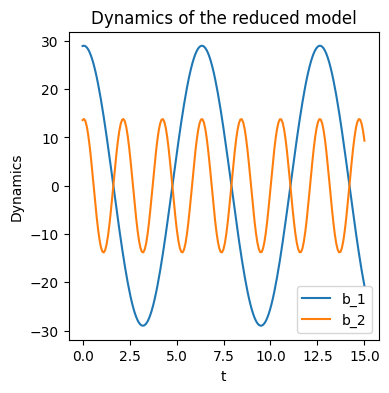

In [461]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [464]:
X_dmd = Phi @ dynamics
print(X_dmd.shape)

(401, 201)


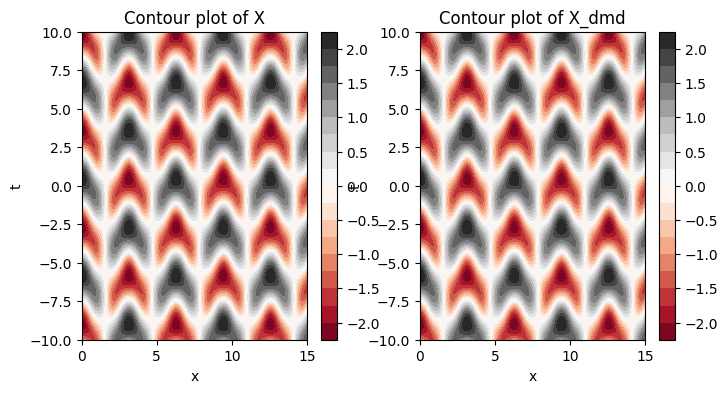

In [466]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.contourf(tt, xx, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 2, 2)
plt.contourf(tt, xx, np.real(X_dmd), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

plt.show()